## Laboratory work 2. Data preprocessing.
### Task1
### Continue work with Titanic dataset from previous laboratory work. Previuosly, you filled missing data for Embarked feature. Now you need to replace missing data for all remaining features. 
### 1. Firstly, find rows with missing data for Fare using isnull() method. You can observe only one row. So, let's fill it with median. Find median value and as condition mention Pclass and Embarked features. Then fill the missing data with found median, don't forget about inplace argument. Finally show result with info() method.

In [58]:
import pandas as pd

In [59]:
df = pd.read_csv("TitanicDataframe.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Survived     1309 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 133.1+ KB


In [60]:
missing_one_row = df[df['Fare'].isnull()]

In [61]:
missing_one_row

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
152,152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,-999


In [62]:
pclass = missing_one_row['Pclass'].values[0]
embarked = missing_one_row['Embarked'].values[0]

median = df[(df['Pclass'] == pclass) & (df['Embarked'] == embarked)]['Fare'].median()
#finding median with Pclass & Embarked conditions
print(median)

8.05


In [63]:
df['Fare'].fillna(median, inplace=True)
df
#replacing NaN with median

C:\Users\santa\AppData\Local\Temp\ipykernel_6068\3102898040.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(median, inplace=True)


,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-999
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,-999
2,2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-999
3,3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-999
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
1305,887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
1306,888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
1307,889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [64]:
df.info()
#now Fare has no NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Survived     1309 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 133.1+ KB


### 2. Next, you have to handle missing data of Age feature. First of all show missing data for Age using isnull() method

In [65]:
df[df['Age'].isnull()]

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
10,10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,-999
22,22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,-999
29,29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C,-999
33,33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,-999
36,36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,859,860,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,0
1281,863,864,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,0
1286,868,869,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,0
1296,878,879,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,0


### 3. Pay attention to the Name feature, where except name, there is title/position. So, based on this feature we can determine missing data for Age feature.
### First of all, show Name feature. So, in GetTitle(name) method you have to split the name till comma, then again split till dot, next convert the title to lower case and finally return this value of the title.

In [66]:
df['Name']

0                                   Kelly, Mr. James
1                   Wilkes, Mrs. James (Ellen Needs)
2                          Myles, Mr. Thomas Francis
3                                   Wirz, Mr. Albert
4       Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                            ...                     
1304                           Montvila, Rev. Juozas
1305                    Graham, Miss. Margaret Edith
1306        Johnston, Miss. Catherine Helen "Carrie"
1307                           Behr, Mr. Karl Howell
1308                             Dooley, Mr. Patrick
Name: Name, Length: 1309, dtype: object

In [67]:
copy_df = df.copy()

### 4. Use the method GetTitle() for each name in the dataframe.

In [68]:
def GetTitle(name):
    surname = name.split(',')[0].strip()
    title_part = name.split(',')[1]
    title = title_part.split('.')[0].strip().lower()
    given_name = title_part.split('.')[1].strip()
    full_name = f"{surname} {given_name}"
    return title, full_name

In [69]:
df['Title'], df['FullName'] = zip(*df['Name'].apply(GetTitle))
df.drop(columns=['Name'], inplace=True)
df

,Unnamed: 0,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,FullName
0,0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,-999,mr,Kelly James
1,1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,-999,mrs,Wilkes James (Ellen Needs)
2,2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,-999,mr,Myles Thomas Francis
3,3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,-999,mr,Wirz Albert
4,4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,-999,mrs,Hirvonen Alexander (Helga E Lindqvist)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,886,887,2,male,27.0,0,0,211536,13.0000,NaN,S,0,rev,Montvila Juozas
1305,887,888,1,female,19.0,0,0,112053,30.0000,B42,S,1,miss,Graham Margaret Edith
1306,888,889,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,miss,"Johnston Catherine Helen ""Carrie"""
1307,889,890,1,male,26.0,0,0,111369,30.0000,C148,C,1,mr,Behr Karl Howell


### 5. Now, for previous task use unique() method to get unique values of titles from the dataframe.

In [70]:
df['Title'].unique()

array(['mr', 'mrs', 'miss', 'master', 'ms', 'col', 'rev', 'dr', 'dona',
       'don', 'mme', 'major', 'lady', 'sir', 'mlle', 'capt',
       'the countess', 'jonkheer'], dtype=object)

### 6.Some of the values mean the same, like 'Lady' and 'Dona, it is recommended you to join such kind of values into one. As a result change the method GetTitle(),which will extract the title from the name, however, that time here will be only shorcut values of titles. Use given dict 
                {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }

In [71]:
title_dict = {'mr' : 'Mr',
               'mrs' : 'Mrs',
               'miss' : 'Miss',
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }

In [72]:
def GetTitle(name):
    surname = name.split(',')[0].strip()
    title_part = name.split(',')[1]
    title = title_part.split('.')[0].strip().lower()
    title = title_dict.get(title, title.capitalize())
    given_name = title_part.split('.')[1].strip()
    full_name = f"{surname} {given_name}"
    return title, full_name

copy_df['Title'], copy_df['FullName'] = zip(*copy_df['Name'].apply(GetTitle))

In [73]:
copy_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Officer', 'Sir', 'Lady'],
      dtype=object)

### 7. Here, create a new feature, called 'Title'. Use the changed method GetTitle() for each name in the dataframe.

In [74]:
# Sorry i already use that
copy_df

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,FullName
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-999,Mr,Kelly James
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,-999,Mrs,Wilkes James (Ellen Needs)
2,2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-999,Mr,Myles Thomas Francis
3,3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-999,Mr,Wirz Albert
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-999,Mrs,Hirvonen Alexander (Helga E Lindqvist)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,Sir,Montvila Juozas
1305,887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Miss,Graham Margaret Edith
1306,888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,Miss,"Johnston Catherine Helen ""Carrie"""
1307,889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Mr,Behr Karl Howell


### 8. Create a boxplot, that grouped by Age and Title features and use only not null values of Age feature. Make conclusion based on this boxplot. 

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

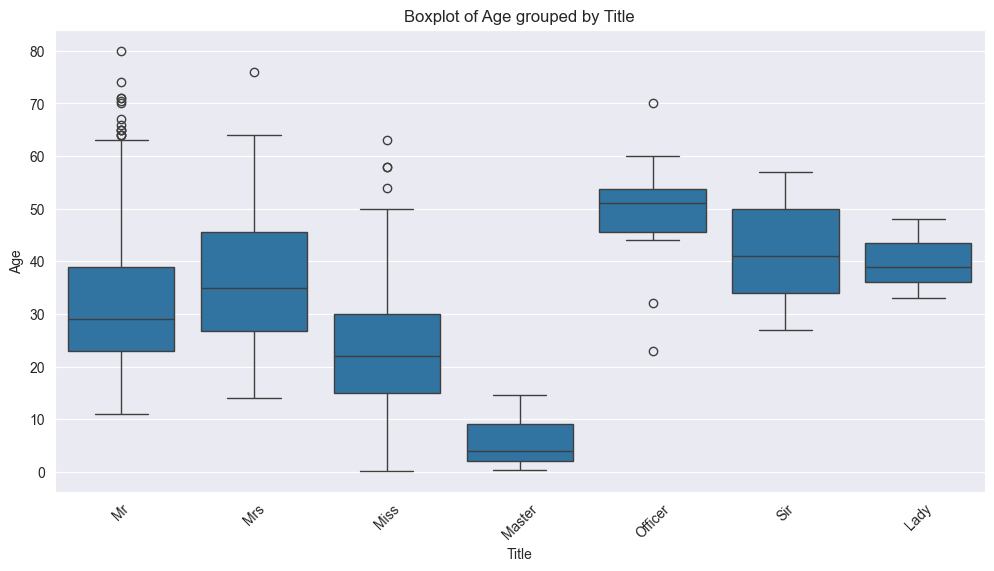

In [76]:
new_age = copy_df[copy_df['Age'].notnull()]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Title', y='Age', data=new_age)
plt.title('Boxplot of Age grouped by Title')
plt.xticks(rotation=45)
plt.show()

#### Conclusion:
1. Mr: Age is mainly from 30 to 40, with a few outliers over 60.
2. Mrs: Age in the range of 35-50 years.
3. Miss: A wide range, but most in the range of 20-30 years.
4. Master: The age is focused on children under 15 years old.
5. Officer and Sir: Mostly over 40 years old.
6. Lady: Age about 45 years old.

### 9. Create a variable title_age_median and initialize it by grouping data by Title and get Age, then call median() method on self producing a DataFrame with transformed values using transform() method. 

In [77]:
title_age_median = copy_df.groupby('Title')['Age'].transform('median')
title_age_median

0       29.0
1       35.0
2       29.0
3       29.0
4       35.0
        ... 
1304    41.0
1305    22.0
1306    22.0
1307    29.0
1308    29.0
Name: Age, Length: 1309, dtype: float64

### 10. Fill missing data for Age feature with title_age_median, don't forget about inplace argument.

In [78]:
copy_df['Age'].fillna(title_age_median, inplace=True)
copy_df['Age'].isnull().sum() # if 0 then ok

C:\Users\santa\AppData\Local\Temp\ipykernel_6068\2211806132.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copy_df['Age'].fillna(title_age_median, inplace=True)


np.int64(0)

### 11. Working with outliers. Build a histogram for Age feature and use this histogram to get understand the distribution. What can you say about distribution?

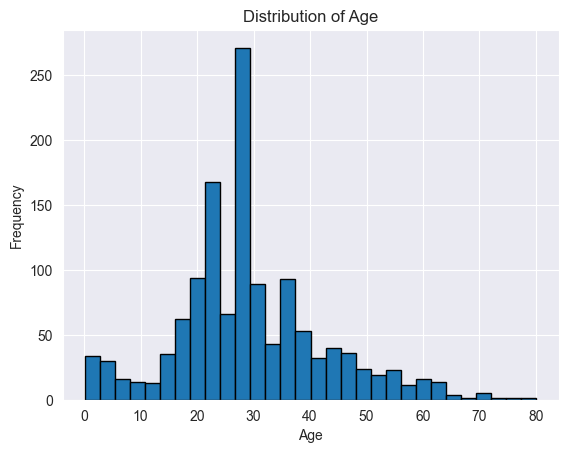

In [79]:
plt.hist(copy_df['Age'], bins=30, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

#### Conclusion: (positive shift). Most passengers are in the 20-40 age range, with a peak around the age of 30. Some emissions are also visible in the younger and older age areas.

### 12. Show passengers, who are over 70 years old.

In [80]:
copy_df[copy_df['Age'] > 70]

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,FullName
96,96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,-999,Mrs,Cavendish Tyrell William (Julia Florence Siegel)
514,96,97,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0,Mr,Goldschmidt George B
534,116,117,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,0,Mr,Connors Patrick
911,493,494,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0,Mr,Artagaveytia Ramon
1048,630,631,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1,Mr,Barkworth Algernon Henry Wilson
1269,851,852,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0,Mr,Svensson Johan


### 13. Create a histogram for fare feature, set title 'Histogram for fare', set bins as 20 and set color. Make conclusion based on this histogram.

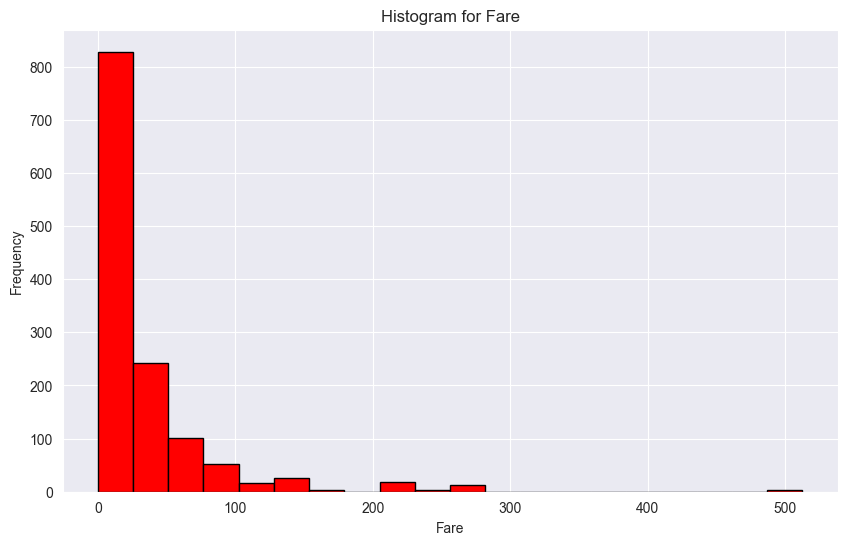

In [81]:
plt.figure(figsize=(10, 6))
plt.hist(copy_df['Fare'], bins=20, color='red', edgecolor='black')
plt.title('Histogram for Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)

#### Conclusion : Most of passengers pay to ticket about 50$

### 14. Create a boxplot for Fare feature to indentify outliers, what can you say based on this boxplot?

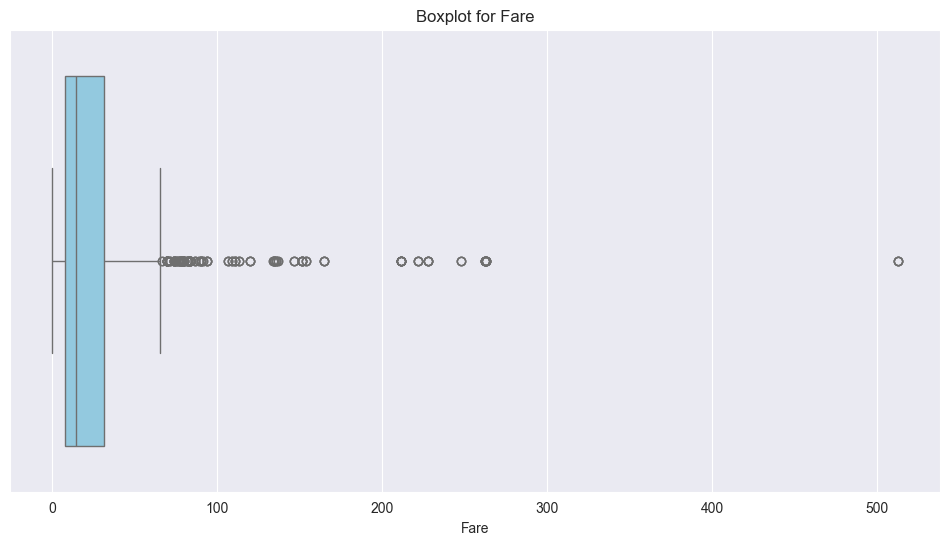

count    1309.000000
mean       33.276193
std        51.743584
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [82]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=copy_df['Fare'], color='skyblue')
plt.title('Boxplot for Fare')
plt.show()

copy_df['Fare'].describe()

#### Conclusion : Most of the passengers were poor people, but it is possible that the graph shows that there were also rich people who survived the Titanic crash

### 15. To look into the outliers show the data, where Fare is maximum.

In [83]:
copy_df[copy_df['Fare'] == copy_df['Fare'].max()]

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,FullName
343,343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,-999,Mrs,Cardeza James Warburton Martinez (Charlotte Wa...
676,258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1,Miss,Ward Anna
1097,679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1,Mr,Cardeza Thomas Drake Martinez
1155,737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1,Mr,Lesurer Gustave J


### 16. Next, let's try some transformations to reduce the skewness. Using the logarithm, let's convert the asymmetric data to more symmetric data. And notice to add 1 to accomodate zero fares : log(0) is not defined. Then show a histogram for the logarithm Fare.

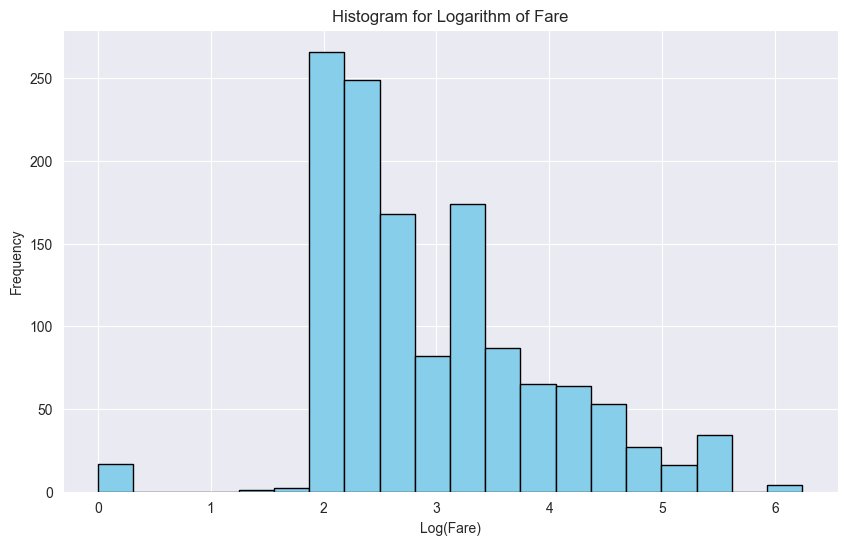

In [84]:
import numpy as np

copy_df['Fare_log'] = np.log1p(copy_df['Fare'])
plt.figure(figsize=(10, 6))
plt.hist(copy_df['Fare_log'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram for Logarithm of Fare')
plt.xlabel('Log(Fare)')
plt.ylabel('Frequency')
plt.grid(True)

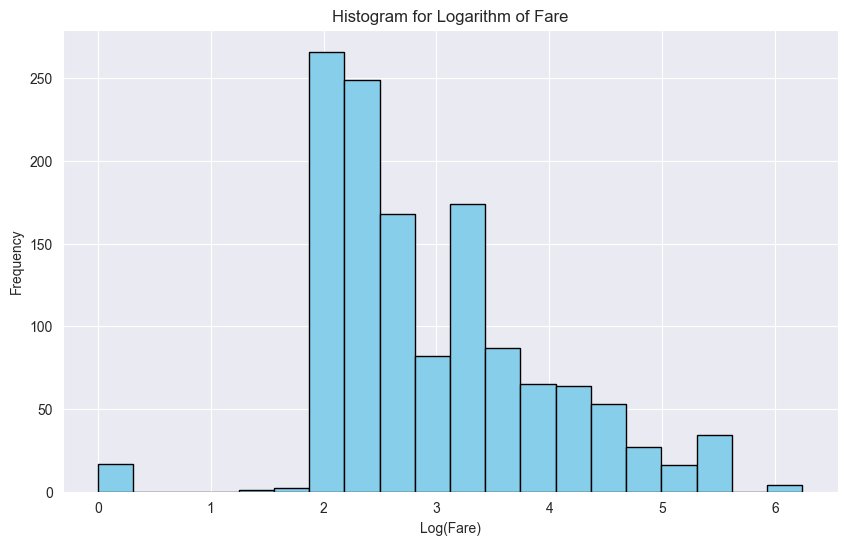

In [85]:
copy_df['Fare_log'] = np.log(copy_df['Fare'] + 1)

# Построение гистограммы для преобразованного столбца Fare_log
plt.figure(figsize=(10, 6))
plt.hist(copy_df['Fare_log'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram for Logarithm of Fare')
plt.xlabel('Log(Fare)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 17. Using qcut() function, quantile-based discretization function, discretize Fare variable into 4 equal-sized buckets. Produce a Categorical object indicating quantile membership for each data point like 'very_low', 'low', 'high', 'very_high' labels.

In [86]:
fare_labels = ['very_low', 'low', 'high', 'very_high']
copy_df['Fare_bucket'] = pd.qcut(copy_df['Fare'], q=4, labels=fare_labels)
copy_df[['Fare', 'Fare_bucket']].head()

,Fare,Fare_bucket
0,7.8292,very_low
1,7.0000,very_low
2,9.6875,low
3,8.6625,low
4,12.2875,low


### 18. Based on previous task, get value counts and build a barplot. 

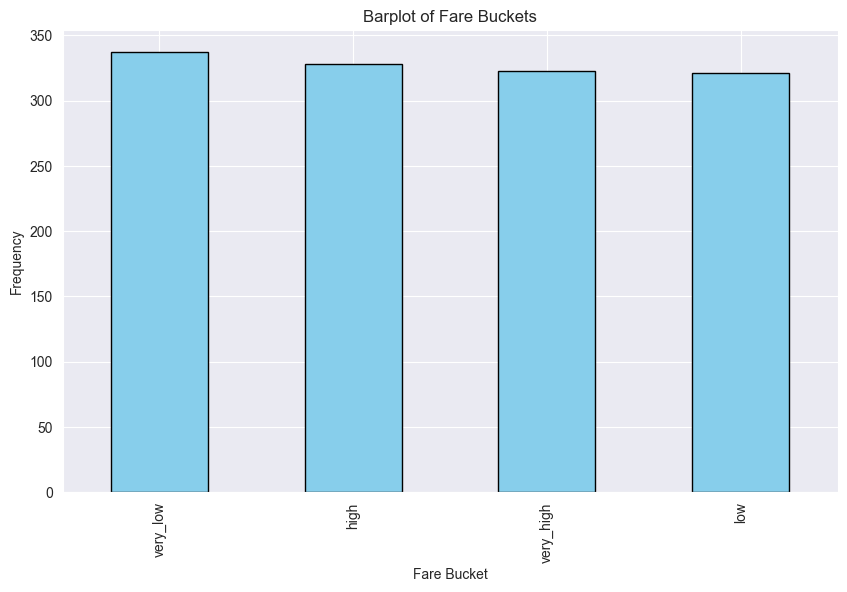

In [87]:
plt.figure(figsize=(10, 6))
copy_df['Fare_bucket'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Barplot of Fare Buckets')
plt.xlabel('Fare Bucket')
plt.ylabel('Frequency')
plt.grid(True)


### 19. Based on previous task, create a new feature, called Fare_Bin.

In [88]:
copy_df['Fare_Bin'] = copy_df['Fare_bucket']
copy_df

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,FullName,Fare_log,Fare_bucket,Fare_Bin
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-999,Mr,Kelly James,2.178064,very_low,very_low
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,-999,Mrs,Wilkes James (Ellen Needs),2.079442,very_low,very_low
2,2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-999,Mr,Myles Thomas Francis,2.369075,low,low
3,3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-999,Mr,Wirz Albert,2.268252,low,low
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-999,Mrs,Hirvonen Alexander (Helga E Lindqvist),2.586824,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,Sir,Montvila Juozas,2.639057,low,low
1305,887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Miss,Graham Margaret Edith,3.433987,high,high
1306,888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,0,Miss,"Johnston Catherine Helen ""Carrie""",3.196630,high,high
1307,889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Mr,Behr Karl Howell,3.433987,high,high


### 20. Using info() function, show information about dataframe.

In [89]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Unnamed: 0   1309 non-null   int64   
 1   PassengerId  1309 non-null   int64   
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   object  
 5   Age          1309 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1309 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1309 non-null   object  
 12  Survived     1309 non-null   int64   
 13  Title        1309 non-null   object  
 14  FullName     1309 non-null   object  
 15  Fare_log     1309 non-null   float64 
 16  Fare_bucket  1309 non-null   category
 17  Fare_Bin     1309 non-null   category
dtypes: category(2), float64(3), 

### 21. Feature engineering. 
### Let's divide the passengers into adults and children. Create a new feature, called 'AgeState', using where() function, which takes first argument as condition that Age is greater or equal than 18. If given condition is True, value of new feature is 'Adult', else it is 'Child'.

In [90]:
copy_df['AgeState'] = np.where(copy_df['Age'] >= 18, 'Adult', 'Child')
copy_df

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,FullName,Fare_log,Fare_bucket,Fare_Bin,AgeState
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-999,Mr,Kelly James,2.178064,very_low,very_low,Adult
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,-999,Mrs,Wilkes James (Ellen Needs),2.079442,very_low,very_low,Adult
2,2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-999,Mr,Myles Thomas Francis,2.369075,low,low,Adult
3,3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-999,Mr,Wirz Albert,2.268252,low,low,Adult
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-999,Mrs,Hirvonen Alexander (Helga E Lindqvist),2.586824,low,low,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,Sir,Montvila Juozas,2.639057,low,low,Adult
1305,887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Miss,Graham Margaret Edith,3.433987,high,high,Adult
1306,888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,0,Miss,"Johnston Catherine Helen ""Carrie""",3.196630,high,high,Adult
1307,889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Mr,Behr Karl Howell,3.433987,high,high,Adult


### 22. Show the new feature AgeState using value_counts() function.

In [91]:
copy_df.value_counts()

Unnamed: 0  PassengerId  Pclass  Name                                                 Sex     Age   SibSp  Parch  Ticket    Fare      Cabin            Embarked  Survived  Title  FullName                                       Fare_log  Fare_bucket  Fare_Bin   AgeState
889         890          1       Behr, Mr. Karl Howell                                male    26.0  0      0      111369    30.0000   C148             C          1        Mr     Behr Karl Howell                               3.433987  high         high       Adult       1
1           2            1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0  1      0      PC 17599  71.2833   C85              C          1        Mrs    Cumings John Bradley (Florence Briggs Thayer)  4.280593  very_high    very_high  Adult       1
3           4            1       Futrelle, Mrs. Jacques Heath (Lily May Peel)         female  35.0  1      0      113803    53.1000   C123             S          1        Mrs    Futrelle

### 23. Using crosstabs() function create a cross tabulation for Survived and AgeState features. Don't forget to exclude -888 value.

In [92]:
filtered_df = copy_df[copy_df['Survived'] != -999]
cross_tab = pd.crosstab(filtered_df['Survived'], filtered_df['AgeState'])
cross_tab

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


### 24. Let's create another feature, called 'FamilySize' by adding Parents with Siblings + 1 for self.
#### Parch - number of parent / children aboard
#### SibSp - number of siblings aboard

In [93]:
copy_df['FamilySize'] = copy_df['Parch'] + copy_df['SibSp'] + 1
copy_df[['Parch', 'SibSp', 'FamilySize']].head()

,Parch,SibSp,FamilySize
0,0,0,1
1,0,1,2
2,0,0,1
3,0,0,1
4,1,1,3


### 25. Create a histogram for new FamilySize feature. Make conclusion based on this histogram.

#### Conclusion: The histogram shows that most of the passengers traveled alone or with a small family (family size 1-2 people). Very few passengers traveled with large families (family size of more than 4 people), which indicates the rarity of large family groups on board.

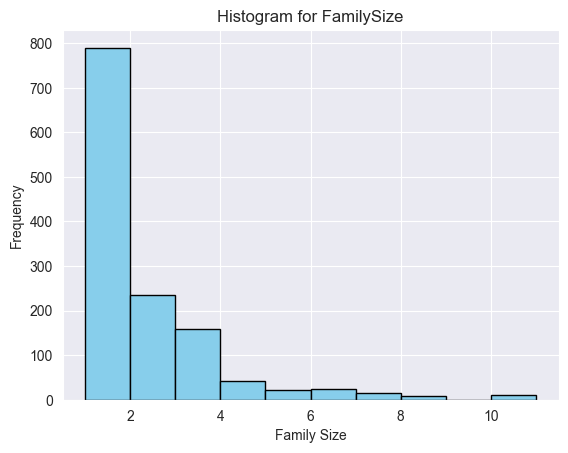

In [94]:
plt.hist(copy_df['FamilySize'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram for FamilySize')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.grid(True)

### 26. To look into the outliers show the data, where FamilySize is maximum.

In [95]:
copy_df[copy_df['FamilySize'] == copy_df['FamilySize'].max()]

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,FullName,Fare_log,Fare_bucket,Fare_Bin,AgeState,FamilySize
188,188,1080,3,"Sage, Miss. Ada",female,22.0,8,2,CA. 2343,69.55,NaN,S,-999,Miss,Sage Ada,4.256322,very_high,very_high,Adult,11
342,342,1234,3,"Sage, Mr. John George",male,29.0,1,9,CA. 2343,69.55,NaN,S,-999,Mr,Sage John George,4.256322,very_high,very_high,Adult,11
360,360,1252,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,-999,Master,Sage William Henry,4.256322,very_high,very_high,Child,11
365,365,1257,3,"Sage, Mrs. John (Annie Bullen)",female,35.0,1,9,CA. 2343,69.55,NaN,S,-999,Mrs,Sage John (Annie Bullen),4.256322,very_high,very_high,Adult,11
577,159,160,3,"Sage, Master. Thomas Henry",male,4.0,8,2,CA. 2343,69.55,NaN,S,0,Master,Sage Thomas Henry,4.256322,very_high,very_high,Child,11
598,180,181,3,"Sage, Miss. Constance Gladys",female,22.0,8,2,CA. 2343,69.55,NaN,S,0,Miss,Sage Constance Gladys,4.256322,very_high,very_high,Adult,11
619,201,202,3,"Sage, Mr. Frederick",male,29.0,8,2,CA. 2343,69.55,NaN,S,0,Mr,Sage Frederick,4.256322,very_high,very_high,Adult,11
742,324,325,3,"Sage, Mr. George John Jr",male,29.0,8,2,CA. 2343,69.55,NaN,S,0,Mr,Sage George John Jr,4.256322,very_high,very_high,Adult,11
1210,792,793,3,"Sage, Miss. Stella Anna",female,22.0,8,2,CA. 2343,69.55,NaN,S,0,Miss,Sage Stella Anna,4.256322,very_high,very_high,Adult,11
1264,846,847,3,"Sage, Mr. Douglas Bullen",male,29.0,8,2,CA. 2343,69.55,NaN,S,0,Mr,Sage Douglas Bullen,4.256322,very_high,very_high,Adult,11


### 27. Using crosstab() function create a cross tabulation for Survived and FamilySize features. Don't forget to exclude -888 value.

In [96]:
filtered_df = copy_df[copy_df['Survived'] != -999]
cross_tab = pd.crosstab(filtered_df['Survived'], filtered_df['FamilySize'])
cross_tab

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


### 28. Let's create another feature, called 'isMother', to find this value you need to use where() function, which takes some conditions as arguments. First condition would be that Sex is female, then Parch number is greater than 0, next Age is greater than 18 and suppose that title is not Miss.

In [97]:
copy_df["isMother"] = np.where(
    (copy_df['Sex'] == 'female') &
    (copy_df['Parch'] > 0) &
    (copy_df['Age'] > 18) &
    (copy_df['Title'] != 'Miss'),
    1, 0
)
copy_df[['Sex', 'Parch', 'Age', 'Title', 'isMother']].head()

,Sex,Parch,Age,Title,isMother
0,male,0,34.5,Mr,0
1,female,0,47.0,Mrs,0
2,male,0,62.0,Mr,0
3,male,0,27.0,Mr,0
4,female,1,22.0,Mrs,1


### 29. Count the values of isMother feature.

In [98]:
copy_df['isMother'].value_counts()

isMother
0    1224
1      85
Name: count, dtype: int64

### 30. Using crosstab() function create a cross tabulation for Survived and isMother features. Don't forget to exclude -888 value.

In [99]:
filtered_df = copy_df[copy_df['Survived'] != -999]
cross_tab = pd.crosstab(filtered_df['Survived'], filtered_df['isMother'])
cross_tab

isMother,0,1
Survived,,
0,533,16
1,303,39


### 31. Next, let's work with Cabin feature. Show it.

In [100]:
copy_df['Cabin']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
1304     NaN
1305     B42
1306     NaN
1307    C148
1308     NaN
Name: Cabin, Length: 1309, dtype: object

### 32. Show unique values of Cabin feature.

In [101]:
copy_df['Cabin'].unique()


array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105', 'C123', 'C103', 'D56', 'A6', 'D33', 'B30',
       'C52', 'B28', 'C83', 'F G73', 'A5', 'D26', 'C110', 'E101', 'F E69',
       'D47', 'B86', 'C2', 'E33', 'B19', 'A7', 'C49', 'A32', 'B4', 'B80',
       'A31', 'D36', 'C93', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125',
       'C99', 'C118', 'D7', 'A19', 'B49', 'C65', 'E36', 'B18', 'C124

### 33. Each value has a letter in upper case and some numbers, whereas you have to notice there is a one value that has no numbers. Suppose, it is an error value. Let's convert it into Nan. 

In [102]:
copy_df['Cabin'] = np.where(copy_df['Cabin'].str.contains('\d', na=False), copy_df['Cabin'], np.nan)
copy_df['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22', 'B10',
       'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64', 'A11',
       'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89', 'F E46',
       'A34', 'B26', 'C22 C26', 'B69', 'C32', 'B78', 'F E57', 'F2', 'A18',
       'C106', 'B51 B53 B55', 'D10 D12', 'E60', 'E50', 'E39 E41',
       'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7', 'D40', 'D38',
       'C105', 'C123', 'C103', 'D56', 'A6', 'D33', 'B30', 'C52', 'B28',
       'C83', 'F G73', 'A5', 'D26', 'C110', 'E101', 'F E69', 'D47', 'B86',
       'C2', 'E33', 'B19', 'A7', 'C49', 'A32', 'B4', 'B80', 'A31', 'D36',
       'C93', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118',
       'D7', 'A19', 'B49', 'C65', 'E36', 'B18', 'C124', 'C91', 

### 34. Create a function, called get_deck, which takes argument Cabin and returns changed values as 'Z' for NaN values of Cabin argument, and drops numbers of existed values of Cabin. As a result, function returns letter in upper case.

In [103]:
def get_deck(Cabin):
    if pd.isnull(Cabin):
        return 'Z'
    else:
        return Cabin[0].upper()

### 35. Let's create another feature, called 'Deck', to find this value you need to call get_deck() function.

In [104]:
copy_df['Deck'] = copy_df['Cabin'].apply(get_deck)
copy_df['Deck'].unique()

array(['Z', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

### 36. Let's look at dataframe, call info() function, now we have new 5 features.

In [105]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Unnamed: 0   1309 non-null   int64   
 1   PassengerId  1309 non-null   int64   
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   object  
 5   Age          1309 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1309 non-null   float64 
 10  Cabin        289 non-null    object  
 11  Embarked     1309 non-null   object  
 12  Survived     1309 non-null   int64   
 13  Title        1309 non-null   object  
 14  FullName     1309 non-null   object  
 15  Fare_log     1309 non-null   float64 
 16  Fare_bucket  1309 non-null   category
 17  Fare_Bin     1309 non-null   category
 18  AgeState     1309 non-null  

### 37. Using crosstab() function create a cross tabulation for Survived and Deck features. Don't forget to exclude -888 value.

In [106]:
filtered_df = copy_df[copy_df['Survived'] != -999]
cross_tab = pd.crosstab(filtered_df['Survived'], filtered_df['Deck'])
cross_tab

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,7,8,5,2,483
1,7,35,35,23,24,8,2,208


### 38. Categorical Feature Encoding. Let's work with Gender feature. Create a new feature, called 'isMale', using where() function.

In [107]:
copy_df['isMale'] = np.where(copy_df['Sex'] == 'male', 1, 0)
copy_df

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,FullName,Fare_log,Fare_bucket,Fare_Bin,AgeState,FamilySize,isMother,Deck,isMale
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,...,Mr,Kelly James,2.178064,very_low,very_low,Adult,1,0,Z,1
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,...,Mrs,Wilkes James (Ellen Needs),2.079442,very_low,very_low,Adult,2,0,Z,0
2,2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,...,Mr,Myles Thomas Francis,2.369075,low,low,Adult,1,0,Z,1
3,3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,...,Mr,Wirz Albert,2.268252,low,low,Adult,1,0,Z,1
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,...,Mrs,Hirvonen Alexander (Helga E Lindqvist),2.586824,low,low,Adult,3,1,Z,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,Sir,Montvila Juozas,2.639057,low,low,Adult,1,0,Z,1
1305,887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,Miss,Graham Margaret Edith,3.433987,high,high,Adult,1,0,B,0
1306,888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,...,Miss,"Johnston Catherine Helen ""Carrie""",3.196630,high,high,Adult,4,0,Z,0
1307,889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,Mr,Behr Karl Howell,3.433987,high,high,Adult,1,0,C,1


### 39. Using get_dummies() function encode 'Deck', 'Pclas', 'Title', 'Fare_Bin', 'Embarked', 'AgeState' features. Here must be 2 arguments, first is dataframe, second is list of features.

In [108]:
fff = ['Deck', 'Pclass', 'Title', 'Fare_Bin', 'Embarked', 'AgeState']
copy_df_encoded = pd.get_dummies(copy_df, columns=fff)
copy_df_encoded

,Unnamed: 0,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Sir,Fare_Bin_very_low,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
0,0,892,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,False,True,False,False,False,False,True,False,True,False
1,1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,False,True,False,False,False,False,False,True,True,False
2,2,894,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,False,False,True,False,False,False,True,False,True,False
3,3,895,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,False,False,True,False,False,False,False,True,True,False
4,4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,False,False,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,886,887,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,...,True,False,True,False,False,False,False,True,True,False
1305,887,888,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,...,False,False,False,True,False,False,False,True,True,False
1306,888,889,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,...,False,False,False,True,False,False,False,True,True,False
1307,889,890,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,...,False,False,False,True,False,True,False,False,True,False


### 40. Call info() function, after encoding we have 34 features, and suppose we don't need 'Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex' features. As a result delete them and don't forget about inplace argument.

In [109]:
copy_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Unnamed: 0          1309 non-null   int64   
 1   PassengerId         1309 non-null   int64   
 2   Name                1309 non-null   object  
 3   Sex                 1309 non-null   object  
 4   Age                 1309 non-null   float64 
 5   SibSp               1309 non-null   int64   
 6   Parch               1309 non-null   int64   
 7   Ticket              1309 non-null   object  
 8   Fare                1309 non-null   float64 
 9   Cabin               289 non-null    object  
 10  Survived            1309 non-null   int64   
 11  FullName            1309 non-null   object  
 12  Fare_log            1309 non-null   float64 
 13  Fare_bucket         1309 non-null   category
 14  FamilySize          1309 non-null   int64   
 15  isMother            1309 non-null   in

In [110]:
ffff = ['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex']
copy_df_encoded.drop(columns=ffff, inplace=True)


In [111]:
copy_df_encoded

,Unnamed: 0,PassengerId,Age,Fare,Survived,FullName,Fare_log,Fare_bucket,FamilySize,isMother,...,Title_Sir,Fare_Bin_very_low,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
0,0,892,34.5,7.8292,-999,Kelly James,2.178064,very_low,1,0,...,False,True,False,False,False,False,True,False,True,False
1,1,893,47.0,7.0000,-999,Wilkes James (Ellen Needs),2.079442,very_low,2,0,...,False,True,False,False,False,False,False,True,True,False
2,2,894,62.0,9.6875,-999,Myles Thomas Francis,2.369075,low,1,0,...,False,False,True,False,False,False,True,False,True,False
3,3,895,27.0,8.6625,-999,Wirz Albert,2.268252,low,1,0,...,False,False,True,False,False,False,False,True,True,False
4,4,896,22.0,12.2875,-999,Hirvonen Alexander (Helga E Lindqvist),2.586824,low,3,1,...,False,False,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,886,887,27.0,13.0000,0,Montvila Juozas,2.639057,low,1,0,...,True,False,True,False,False,False,False,True,True,False
1305,887,888,19.0,30.0000,1,Graham Margaret Edith,3.433987,high,1,0,...,False,False,False,True,False,False,False,True,True,False
1306,888,889,22.0,23.4500,0,"Johnston Catherine Helen ""Carrie""",3.196630,high,4,0,...,False,False,False,True,False,False,False,True,True,False
1307,889,890,26.0,30.0000,1,Behr Karl Howell,3.433987,high,1,0,...,False,False,False,True,False,True,False,False,True,False
